In [1]:
# Ignore Warnings.
import warnings
warnings.filterwarnings("ignore")

# Dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime as dt
import scipy.stats as st
import matplotlib.ticker as ticker
import gmaps


# Import the data
main_df_atlantic = pd.read_csv('new_data_atlantic.csv')
# main_df.head()
main_df_atlantic.columns
del main_df_atlantic['Unnamed: 0']
main_df_atlantic

,ID,Name,Date,Time,Status,Latitude,Longitude,Maximum Wind
0,AL011851,UNNAMED,1851-06-25,0,HU,28.0N,94.8W,80
1,AL011851,UNNAMED,1851-06-25,600,HU,28.0N,95.4W,80
2,AL011851,UNNAMED,1851-06-25,1200,HU,28.0N,96.0W,80
3,AL011851,UNNAMED,1851-06-25,1800,HU,28.1N,96.5W,80
4,AL011851,UNNAMED,1851-06-25,2100,HU,28.2N,96.8W,80
...,...,...,...,...,...,...,...,...
49100,AL122015,KATE,2015-11-12,1200,EX,41.3N,50.4W,55
49101,AL122015,KATE,2015-11-12,1800,EX,41.9N,49.9W,55
49102,AL122015,KATE,2015-11-13,0,EX,41.5N,49.2W,50
49103,AL122015,KATE,2015-11-13,600,EX,40.8N,47.5W,45


In [2]:
main_df_atlantic['Month'] = pd.DatetimeIndex(main_df_atlantic['Date']).month_name()
main_df_atlantic['Year'] = pd.DatetimeIndex(main_df_atlantic['Date']).year
HU_df = main_df_atlantic.loc[main_df_atlantic["Status"] == " HU",:]
TS_df= main_df_atlantic.loc[main_df_atlantic["Status"] == " TS",:]
del(HU_df['Date'])
HU_df

,ID,Name,Time,Status,Latitude,Longitude,Maximum Wind,Month,Year
0,AL011851,UNNAMED,0,HU,28.0N,94.8W,80,June,1851
1,AL011851,UNNAMED,600,HU,28.0N,95.4W,80,June,1851
2,AL011851,UNNAMED,1200,HU,28.0N,96.0W,80,June,1851
3,AL011851,UNNAMED,1800,HU,28.1N,96.5W,80,June,1851
4,AL011851,UNNAMED,2100,HU,28.2N,96.8W,80,June,1851
...,...,...,...,...,...,...,...,...,...
49053,AL112015,JOAQUIN,600,HU,40.3N,51.5W,65,October,2015
49094,AL122015,KATE,0,HU,33.1N,71.3W,65,November,2015
49095,AL122015,KATE,600,HU,35.2N,67.6W,70,November,2015
49096,AL122015,KATE,1200,HU,36.2N,62.5W,75,November,2015


In [3]:
HU_df = HU_df[['ID', 'Name', 'Month', 'Year', 'Time', 'Status', 'Latitude', 'Longitude', 'Maximum Wind']]
HU_df_by_ID = HU_df.groupby(['ID'])
HU_df_by_ID_maxWind = HU_df_by_ID.max()
HU_df_by_ID_maxWind.to_csv("GRPbyID.csv")

In [4]:
hurr_cat_bins = [0, 74, 95, 110, 129, 156, 300]

# Create the names for the four bins
hurr_cat = ["TS", "1", "2", "3", "4", "5"]
HU_df_by_ID_maxWind['Category'] = pd.cut(HU_df_by_ID_maxWind['Maximum Wind'], hurr_cat_bins, labels=hurr_cat)
HU_df_by_ID_maxWind.to_csv("GrpbyIDwithBin.csv")
HU_df_by_ID_maxWind.head()


,Name,Month,Year,Time,Status,Latitude,Longitude,Maximum Wind,Category
ID,,,,,,,,,
AL011851,UNNAMED,June,1851,2100,HU,28.2N,97.0W,80,1
AL011852,UNNAMED,August,1852,1800,HU,31.2N,88.6W,100,2
AL011854,UNNAMED,June,1854,1800,HU,26.2N,97.0W,70,TS
AL011855,UNNAMED,August,1855,1200,HU,22.2N,98.0W,90,1
AL011856,UNNAMED,August,1856,1800,HU,30.0N,91.8W,130,4


In [5]:
HU_yearly = HU_df_by_ID_maxWind.groupby(['Year', 'Category']).count()
HU_yearly = HU_yearly.replace(np.NaN, 0)
HU_yearly.head(-10)

Name  Month  Time  Status  Latitude  Longitude  Maximum Wind
Year Category                                                              
1851 TS         0.0    0.0   0.0     0.0       0.0        0.0           0.0
     1          2.0    2.0   2.0     2.0       2.0        2.0           2.0
     2          1.0    1.0   1.0     1.0       1.0        1.0           1.0
     3          0.0    0.0   0.0     0.0       0.0        0.0           0.0
     4          0.0    0.0   0.0     0.0       0.0        0.0           0.0
...             ...    ...   ...     ...       ...        ...           ...
2013 3          0.0    0.0   0.0     0.0       0.0        0.0           0.0
     4          0.0    0.0   0.0     0.0       0.0        0.0           0.0
     5          0.0    0.0   0.0     0.0       0.0        0.0           0.0
2014 TS         2.0    2.0   2.0     2.0       2.0        2.0           2.0
     1          2.0    2.0   2.0     2.0       2.0        2.0           2.0

[968 rows x 7 columns]

In [6]:
HU_yearly.max(level=1)

,Name,Month,Time,Status,Latitude,Longitude,Maximum Wind
Category,,,,,,,
TS,4.0,4.0,4.0,4.0,4.0,4.0,4.0
1,6.0,6.0,6.0,6.0,6.0,6.0,6.0
2,4.0,4.0,4.0,4.0,4.0,4.0,4.0
3,3.0,3.0,3.0,3.0,3.0,3.0,3.0
4,4.0,4.0,4.0,4.0,4.0,4.0,4.0
5,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [8]:
HU_yearly.head()

Name  Month  Time  Status  Latitude  Longitude  Maximum Wind
Year Category                                                              
1851 TS         0.0    0.0   0.0     0.0       0.0        0.0           0.0
     1          2.0    2.0   2.0     2.0       2.0        2.0           2.0
     2          1.0    1.0   1.0     1.0       1.0        1.0           1.0
     3          0.0    0.0   0.0     0.0       0.0        0.0           0.0
     4          0.0    0.0   0.0     0.0       0.0        0.0           0.0

In [9]:
list_x_axis = [label[0] for label in HU_yearly.index]
list_x_axis_ft = []

for each_label in list_x_axis:
    if each_label not in list_x_axis_ft:
        list_x_axis_ft.append(each_label)
list_x_axis_ft

[1851,
 1852,
 1853,
 1854,
 1855,
 1856,
 1857,
 1858,
 1859,
 1860,
 1861,
 1862,
 1863,
 1864,
 1865,
 1866,
 1867,
 1868,
 1869,
 1870,
 1871,
 1872,
 1873,
 1874,
 1875,
 1876,
 1877,
 1878,
 1879,
 1880,
 1881,
 1882,
 1883,
 1884,
 1885,
 1886,
 1887,
 1888,
 1889,
 1890,
 1891,
 1892,
 1893,
 1894,
 1895,
 1896,
 1897,
 1898,
 1899,
 1900,
 1901,
 1902,
 1903,
 1904,
 1905,
 1906,
 1908,
 1909,
 1910,
 1911,
 1912,
 1913,
 1915,
 1916,
 1917,
 1918,
 1919,
 1920,
 1921,
 1922,
 1923,
 1924,
 1925,
 1926,
 1927,
 1928,
 1929,
 1930,
 1931,
 1932,
 1933,
 1934,
 1935,
 1936,
 1937,
 1938,
 1939,
 1940,
 1941,
 1942,
 1943,
 1944,
 1945,
 1946,
 1947,
 1948,
 1949,
 1950,
 1951,
 1952,
 1953,
 1954,
 1955,
 1956,
 1957,
 1958,
 1959,
 1960,
 1961,
 1962,
 1963,
 1964,
 1965,
 1966,
 1967,
 1968,
 1969,
 1970,
 1971,
 1972,
 1973,
 1974,
 1975,
 1976,
 1977,
 1978,
 1979,
 1980,
 1981,
 1982,
 1983,
 1984,
 1985,
 1986,
 1987,
 1988,
 1989,
 1990,
 1991,
 1992,
 1993,
 1994,
 1995,

<Figure size 720x576 with 0 Axes>

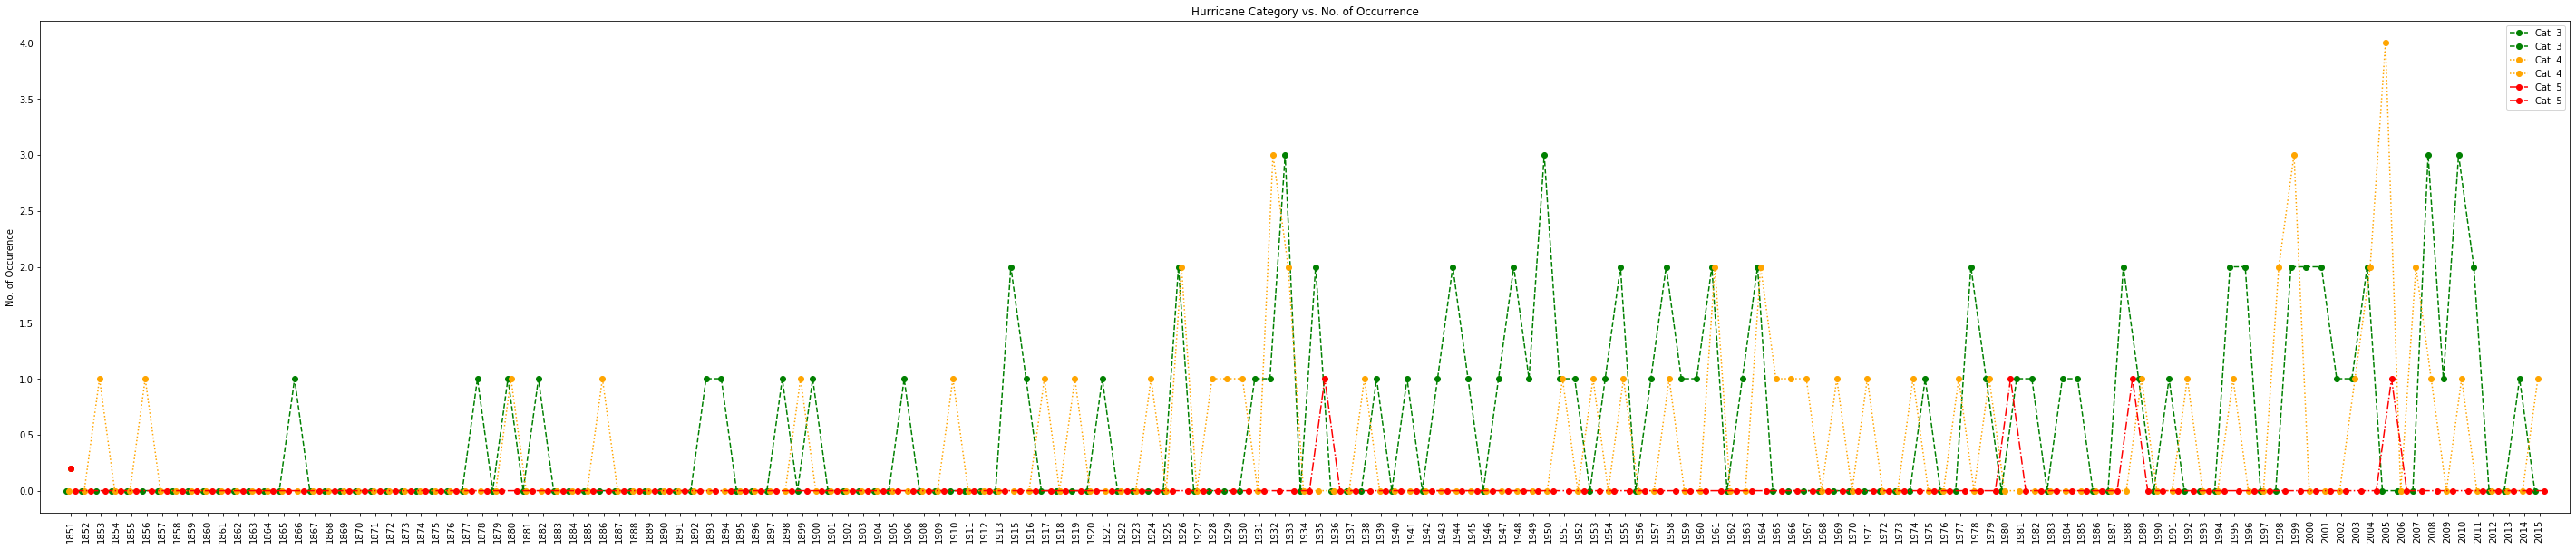

In [11]:
labels = list_x_axis_ft
cat1 = HU_yearly.loc[(list_x_axis_ft,'1'), 'Name'].reset_index(level=0, drop=True)
cat2 = HU_yearly.loc[(list_x_axis_ft,'2'), 'Name'].reset_index(level=0, drop=True)
cat3 = HU_yearly.loc[(list_x_axis_ft,'3'), 'Name'].reset_index(level=0, drop=True)
cat4 = HU_yearly.loc[(list_x_axis_ft,'4'), 'Name'].reset_index(level=0, drop=True)
cat5 = HU_yearly.loc[(list_x_axis_ft,'5'), 'Name'].reset_index(level=0, drop=True)

x = np.arange(0, len(labels), 1)  # the label locations

# you might have to increase the size of the figure
plt.figure(figsize=(10, 8))  # width:10, height:8

# plt.bar(new_x, my_dict.values(), align='center', width=0.8)
width = 0.2 # the width of the bars

fig, ax = plt.subplots()
# cat1bar = ax.bar(x - 2*width, cat1, width, label='Cat. 1')
# cat2bar = ax.bar(x - width, cat2, width, label='Cat. 2')
cat3bar = ax.plot(x - width/2 - width, cat3, width, label='Cat. 3', linestyle="--", color='g', marker='o')
cat4bar = ax.plot(x - width/2, cat4, width, label='Cat. 4', linestyle=":", color='orange', marker='o')
cat5bar = ax.plot(x + 3/2*width, cat5, width, label='Cat. 5', linestyle="-.", color='r', marker='o')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('No. of Occurence')
ax.set_title('Hurricane Category vs. No. of Occurrence')
ax.set_xticks(x)
ax.set_xticklabels(labels)
plt.xlim(min(x)-2,max(x)+2 )
fig.set_size_inches(50, 10)
plt.xticks(rotation=90)
ax.legend()
plt.show()

In [32]:
HU_df_by_ID = HU_df.groupby(['ID']).first
type(HU_df_by_ID)

method

In [46]:
main_hurricane_location_df = HU_df.loc[HU_df['Year'] > 2004, :]
main_hurricane_location_df.groupby('Year')['ID'].unique()
hurricane_location_df = main_hurricane_location_df[['Latitude', 'Longitude']]
hurricane_location_df['Latitude'] = hurricane_location_df['Latitude'].str[:-1].astype('float')
hurricane_location_df['Longitude'] = hurricane_location_df['Longitude'].str[:-1].astype('float')
hurricane_location_df['Longitude'] = hurricane_location_df['Longitude']*(-1)
hurricane_location_df

,Latitude,Longitude
43759,28.5,-90.3
43760,29.2,-90.1
43793,16.2,-73.0
43794,16.7,-74.1
43795,17.6,-74.9
...,...,...
49053,40.3,-51.5
49094,33.1,-71.3
49095,35.2,-67.6
49096,36.2,-62.5


In [47]:
hurricane_layer = gmaps.symbol_layer(
    hurricane_location_df, fill_color='red', scale=2)

fig = gmaps.figure()
fig.add_layer(hurricane_layer)
plt.savefig('Hurricane_Loc_Atlantic.png')
fig

Figure(layout=FigureLayout(height='420px'))

<Figure size 432x288 with 0 Axes>